In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [13]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()
df.head()
df.dtypes

num_stars                    int64
single_planet_exosystem       bool
discoverymethod             object
disc_year                    int64
disc_facility               object
                            ...   
sy_kmagerr1                float64
sy_kmagerr2                float64
sy_gaiamag                 float64
sy_gaiamagerr1             float64
sy_gaiamagerr2             float64
Length: 63, dtype: object

In [14]:
df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 'Yes', False: 'No'})

single_planet_exosystem_Yes
True     1674
False    1408
Name: count, dtype: int64
single_planet_exosystem_Yes
True     54.31538
False    45.68462
Name: count, dtype: float64


<Axes: xlabel='single_planet_exosystem_Yes', ylabel='count'>

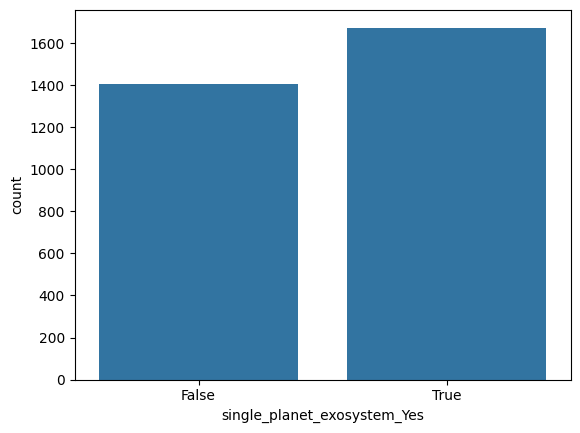

In [15]:
df_obj = df.select_dtypes(include='object')
df_obj.head()

df_obj= pd.get_dummies(df_obj, drop_first=True)
df_obj.head()
print(df_obj['single_planet_exosystem_Yes'].value_counts())
print( (df_obj['single_planet_exosystem_Yes'].value_counts()/ df_obj['single_planet_exosystem_Yes'].value_counts().sum()) * 100)
sns.countplot(data=df_obj, x='single_planet_exosystem_Yes')



In [16]:
attr = df_obj.drop('single_planet_exosystem_Yes', axis=1)
target = df_obj['single_planet_exosystem_Yes']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=5,max_leaf_nodes=5)

In [18]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.6216216216216216  

 Confusion Matrix:
[[ 79 349]
 [  1 496]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.18      0.31       428
        True       0.59      1.00      0.74       497

    accuracy                           0.62       925
   macro avg       0.79      0.59      0.53       925
weighted avg       0.77      0.62      0.54       925



In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from C45 import C45Classifier

clf=C45Classifier()
# Train the classifier
clf.fit(attr_train,target_train)
target_pred2 = clf.predict(attr_test)
print(f"\n Accuracy: {accuracy_score(target_test,target_pred2)}  ")

print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred2))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred2))


 Accuracy: 0.6681081081081081  

 Confusion Matrix:
[[162 266]
 [ 41 456]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.38      0.51       428
        True       0.63      0.92      0.75       497

    accuracy                           0.67       925
   macro avg       0.71      0.65      0.63       925
weighted avg       0.71      0.67      0.64       925

